In [341]:
import pandas as pd
import numpy as np

In [342]:
products_df = pd.read_csv('PRODUCTS_TAKEHOME.csv')
transactions_df = pd.read_csv('TRANSACTION_TAKEHOME.csv')
user_df = pd.read_csv('USER_TAKEHOME.csv')

# Exploratory data Analysis

In [343]:
# 1. Fix missing and invalid values in FINAL_SALE in transactions
# Convert 'FINAL_SALE' to numeric, replacing NaN with 0
transactions_df['FINAL_SALE'] = pd.to_numeric(transactions_df['FINAL_SALE'], errors='coerce').fillna(0)

In [344]:
# 2. # 1. Simplify FINAL_QUANTITY by standardizing values
# Convert "zero" or any other non-numeric values to 0 and ensure all entries are numeric
transactions_df['FINAL_QUANTITY'] = pd.to_numeric(
    transactions_df['FINAL_QUANTITY'].replace({'zero': 0}), errors='coerce').fillna(0)

In [345]:
# 3. Standardize CATEGORY levels for better understanding
# Fill missing category values with "Uncategorized" to avoid gaps
for category in ['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4']:
    products_df[category] = products_df[category].fillna('Uncategorized')

In [346]:
# 4. Unify USER_ID and ID fields
# Convert both to string and strip any whitespace for consistent matching
transactions_df['USER_ID'] = transactions_df['USER_ID'].astype(str).str.strip()
user_df['ID'] = user_df['ID'].astype(str).str.strip()

In [347]:
# 5. Standardize STATE field in user data
# Convert STATE codes to uppercase for consistency
user_df['STATE'] = user_df['STATE'].str.upper()


In [348]:
# 6. Standardize Date Formats
# Convert date columns to datetime and drop rows where dates could not be converted
transactions_df['PURCHASE_DATE'] = pd.to_datetime(transactions_df['PURCHASE_DATE'], errors='coerce')
user_df['CREATED_DATE'] = pd.to_datetime(user_df['CREATED_DATE'], errors='coerce')
transactions_df['SCAN_DATE'] = pd.to_datetime(transactions_df['SCAN_DATE'], errors='coerce')
transactions_df.dropna(subset=['PURCHASE_DATE'], inplace=True)
transactions_df.dropna(subset=['SCAN_DATE'], inplace=True)
user_df.dropna(subset=['CREATED_DATE'], inplace=True)



In [349]:
# 7. Fill Missing Product Details with Descriptive Placeholders
# Fill NaN values in 'MANUFACTURER' and 'BRAND' with 'Unknown' or 'Not Provided'
products_df['MANUFACTURER'] = products_df['MANUFACTURER'].fillna('Unknown')
products_df['BRAND'] = products_df['BRAND'].fillna('Not Provided')

In [350]:
# 8. Remove Duplicates in Transactions
# Remove duplicates based on critical columns
transactions_df.drop_duplicates(subset=['RECEIPT_ID', 'PURCHASE_DATE', 'USER_ID'], keep='first', inplace=True)

In [351]:
# 9. Verify Data Integrity
# Display info to ensure all columns are in consistent format and types
print("Transactions DataFrame Info:")
print(transactions_df.info())
print("\nUser DataFrame Info:")
print(user_df.info())
print("\nProducts DataFrame Info:")
print(products_df.info())


Transactions DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 24440 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   RECEIPT_ID      24440 non-null  object             
 1   PURCHASE_DATE   24440 non-null  datetime64[ns]     
 2   SCAN_DATE       24440 non-null  datetime64[ns, UTC]
 3   STORE_NAME      24440 non-null  object             
 4   USER_ID         24440 non-null  object             
 5   BARCODE         21639 non-null  float64            
 6   FINAL_QUANTITY  24440 non-null  float64            
 7   FINAL_SALE      24440 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(3), object(3)
memory usage: 1.7+ MB
None

User DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype              
---  ------

In [352]:
# Save the cleaned data
transactions_df.to_csv('CLEANED_TRANSACTION_TAKEHOME_1.csv', index=False)
user_df.to_csv('CLEANED_USER_TAKEHOME_1.csv', index=False)
products_df.to_csv('CLEANED_PRODUCTS_TAKEHOME_1.csv', index=False)

# Visualizations



In [353]:
products_df = pd.read_csv('CLEANED_PRODUCTS_TAKEHOME_1.csv')
transactions_df = pd.read_csv('CLEANED_TRANSACTION_TAKEHOME_1.csv')
user_df = pd.read_csv('CLEANED_USER_TAKEHOME_1.csv')

In [354]:
user_df['CREATED_DATE'] = pd.to_datetime(user_df['CREATED_DATE'])
transactions_df['PURCHASE_DATE'] = pd.to_datetime(transactions_df['PURCHASE_DATE'])

In [355]:
# 1. User Growth Over Time
# Extract year and count new users per year
user_df['created_year'] = user_df['CREATED_DATE'].dt.year
user_growth_trend = user_df['created_year'].value_counts().sort_index()

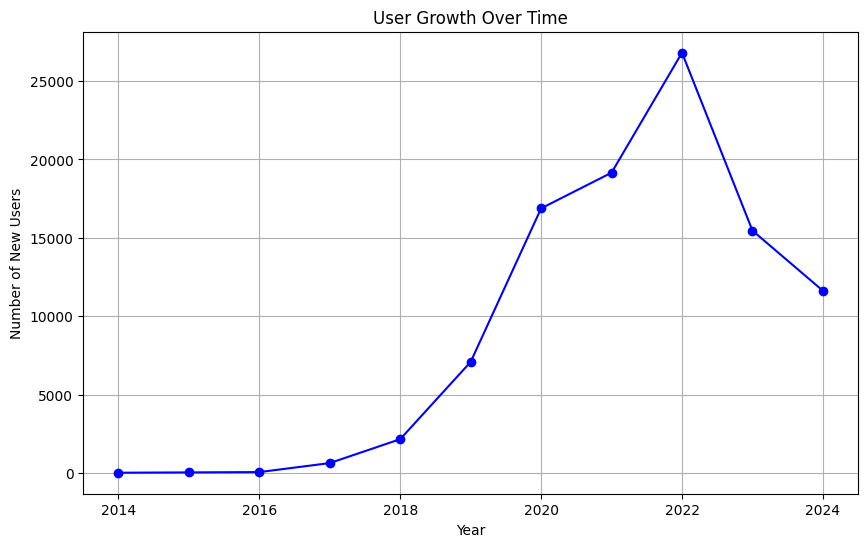

In [356]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
user_growth_trend.plot(kind='line', marker='o', color='blue')
plt.title('User Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Number of New Users')
plt.grid(True)
plt.show()


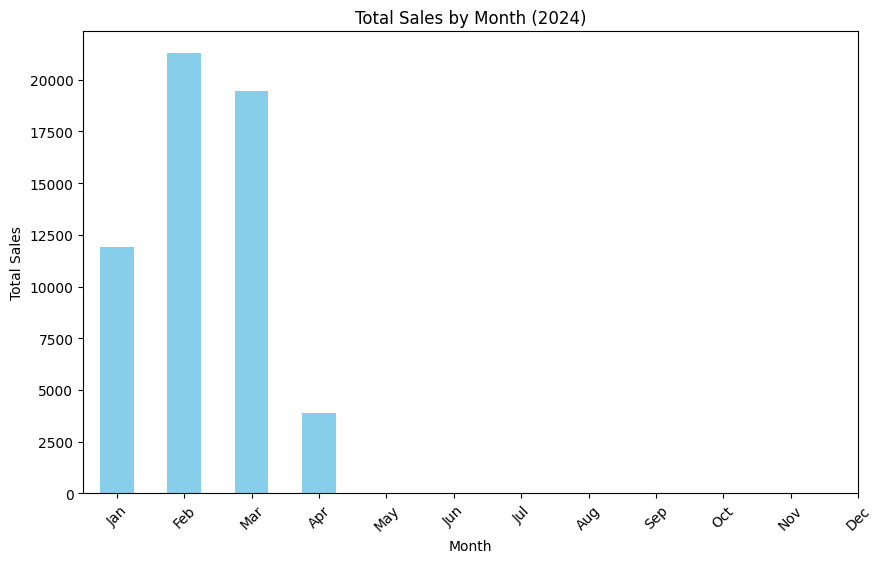

In [357]:
# 2. Total Sales by Month for 2024
# Filter transactions for 2024 and extract month from PURCHASE_DATE
transactions_df['purchase_year'] = transactions_df['PURCHASE_DATE'].dt.year
transactions_2024 = transactions_df[transactions_df['purchase_year'] == 2024]
transactions_2024['purchase_month'] = transactions_2024['PURCHASE_DATE'].dt.month
monthly_sales_2024 = transactions_2024.groupby('purchase_month')['FINAL_SALE'].sum()

plt.figure(figsize=(10, 6))
monthly_sales_2024.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Month (2024)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


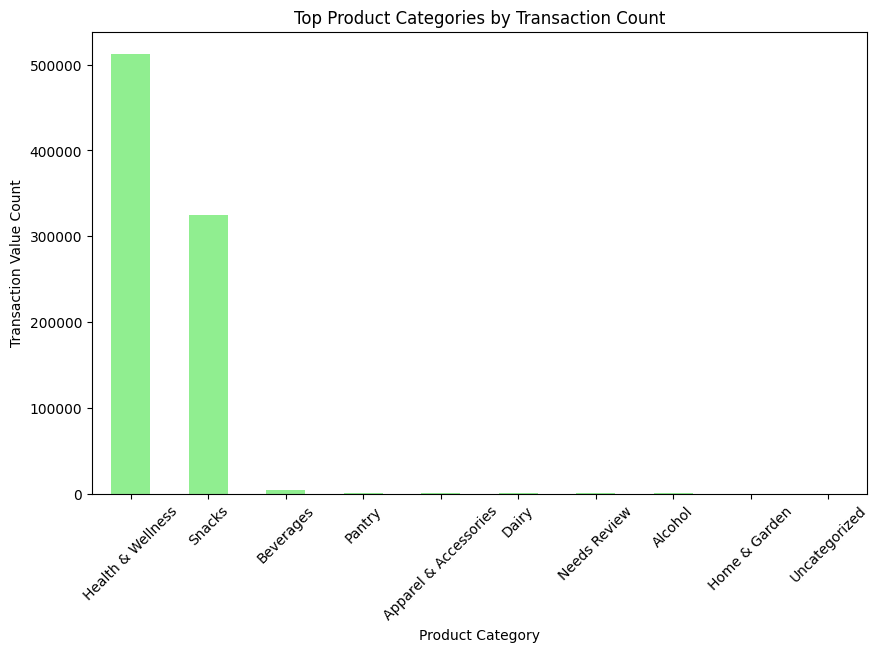

In [358]:
# 3. Top Product Categories by Transaction Count
# Count occurrences of each CATEGORY_1 in products_df
top_categories = products_df['CATEGORY_1'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='lightgreen')
plt.title('Top Product Categories by Transaction Count')
plt.xlabel('Product Category')
plt.ylabel('Transaction Value Count')
plt.xticks(rotation=45)
plt.show()

# Q2 . Close Ended
Who are Fetch's Power users ?

In [359]:
# Convert necessary columns to datetime
transactions_df['PURCHASE_DATE'] = pd.to_datetime(transactions_df['PURCHASE_DATE'], errors='coerce')
user_df['CREATED_DATE'] = pd.to_datetime(user_df['CREATED_DATE'], errors='coerce')

In [360]:
# Calculate monthly scans per user
transactions_df['year'] = transactions_df['PURCHASE_DATE'].dt.year
transactions_df['month'] = transactions_df['PURCHASE_DATE'].dt.month

In [361]:
# Group by user, year, and month to count monthly scans
monthly_scans = transactions_df.groupby(['USER_ID', 'year', 'month']).size().reset_index(name='monthly_scan_count')

In [362]:
# Filter users with an average monthly scan count greater than 20
frequent_users = (
    monthly_scans.groupby('USER_ID')['monthly_scan_count']
    .mean()
    .reset_index(name='avg_monthly_scans')
    .query('avg_monthly_scans > 1')
)

In [363]:
# 2. Calculate Total Spending Per User
# Convert FINAL_SALE to numeric, handling non-numeric values as NaN and filling NaN with 0
transactions_df['FINAL_SALE'] = pd.to_numeric(transactions_df['FINAL_SALE'], errors='coerce').fillna(0)
high_spending_users = (
    transactions_df.groupby('USER_ID')['FINAL_SALE']
    .sum()
    .reset_index(name='total_spending')
)

In [364]:
# Ensure 'CREATED_DATE' is in datetime format and make it timezone-naive
user_df['CREATED_DATE'] = pd.to_datetime(user_df['CREATED_DATE'], errors='coerce').dt.tz_localize(None)

# Set today's date as timezone-naive
today = pd.Timestamp.now().replace(tzinfo=None)

# Calculate account age in months using an approximate average of 30.44 days per month
user_df['account_age_months'] = ((today - user_df['CREATED_DATE']).dt.days / 30.44).astype(int)

# Filter users with an account age of at least 12 months
long_tenure_users = user_df.query('account_age_months >= 12')[['ID', 'account_age_months']]

# Display the result
print(long_tenure_users.head())


                         ID  account_age_months
0  5ef3b4f17053ab141787697d                  52
1  5ff220d383fcfc12622b96bc                  45
2  6477950aa55bb77a0e27ee10                  16
4  653cf5d6a225ea102b7ecdc2                  12
5  5fe2b6f3ad416a1265c4ab68                  46


In [365]:
power_users = (
    frequent_users
    .merge(high_spending_users, left_on='USER_ID', right_on='USER_ID')
    .merge(long_tenure_users, left_on='USER_ID', right_on='ID')
    .sort_values(by='total_spending', ascending=False)
    .head(10)
)

In [366]:
from IPython.display import display
display(power_users)

,USER_ID,avg_monthly_scans,total_spending,ID,account_age_months
8,64dd9170516348066e7c4006,2.0,13.26,64dd9170516348066e7c4006,14
0,5b441360be53340f289b0795,2.0,7.99,5b441360be53340f289b0795,75
3,610a8541ca1fab5b417b5d33,1.5,6.68,610a8541ca1fab5b417b5d33,38
9,6528a0a388a3a884364d94dc,3.0,6.25,6528a0a388a3a884364d94dc,12
4,61a58ac49c135b462ccddd1c,1.5,4.93,61a58ac49c135b462ccddd1c,34
6,631e23bc198485e89002613b,2.0,3.58,631e23bc198485e89002613b,25
5,62d86d9a1d76344f1a3602d9,2.0,0.86,62d86d9a1d76344f1a3602d9,27
1,5f222804d52f48146ba7112e,2.0,0.00,5f222804d52f48146ba7112e,50
2,5f64fff6dc25c93de0383513,2.0,0.00,5f64fff6dc25c93de0383513,49
7,643059f0838dd2651fb27f50,2.0,0.00,643059f0838dd2651fb27f50,18


Power Users determined based on monthly-Scans, total spending $ value and account age in months

In [367]:
print(power_users)

                    USER_ID  avg_monthly_scans  total_spending  \
8  64dd9170516348066e7c4006                2.0           13.26   
0  5b441360be53340f289b0795                2.0            7.99   
3  610a8541ca1fab5b417b5d33                1.5            6.68   
9  6528a0a388a3a884364d94dc                3.0            6.25   
4  61a58ac49c135b462ccddd1c                1.5            4.93   
6  631e23bc198485e89002613b                2.0            3.58   
5  62d86d9a1d76344f1a3602d9                2.0            0.86   
1  5f222804d52f48146ba7112e                2.0            0.00   
2  5f64fff6dc25c93de0383513                2.0            0.00   
7  643059f0838dd2651fb27f50                2.0            0.00   

                         ID  account_age_months  
8  64dd9170516348066e7c4006                  14  
0  5b441360be53340f289b0795                  75  
3  610a8541ca1fab5b417b5d33                  38  
9  6528a0a388a3a884364d94dc                  12  
4  61a58ac49c135b462ccd

In [368]:
print("Frequent Users:")
print(frequent_users.head())


Frequent Users:
                     USER_ID  avg_monthly_scans
5   5751fbefe4b008fae9acab39                2.0
11  57f52f12e4b09ce053a947ee                2.0
14  5880326ce4b0e8710935ed3a                1.5
28  58bc21dee4b058f7bc9bc594                1.5
33  58bd684be4b0883d67f336d5                1.5


 # Q2. Close Ended
 Which is the leading brand in the Dips & Salsa category?

In [369]:
# Filter products for the "Dips & Salsa" category in CATEGORY_2 (assuming category hierarchy)
dips_and_salsa_products = products_df[products_df['CATEGORY_2'] == 'Dips & Salsa']

In [370]:
# Filter products for the "Dips & Salsa" category and exclude "Not Provided" brands
dips_and_salsa_products = products_df[(products_df['CATEGORY_2'] == 'Dips & Salsa') & (products_df['BRAND'] != 'Not Provided')]

In [371]:
# Merge the Dips & Salsa products with transactions to get relevant transaction data
dips_and_salsa_transactions = transactions_df.merge(
    dips_and_salsa_products[['BARCODE', 'BRAND']],
    on='BARCODE',
    how='inner'
)

In [372]:
# Calculate receipt counts and total sales by brand
leading_brand_by_receipt_count = dips_and_salsa_transactions.groupby('BRAND').size().idxmax()
leading_brand_by_total_sales = dips_and_salsa_transactions.groupby('BRAND')['FINAL_SALE'].sum().idxmax()

In [373]:
# Display the results
print("Leading brand in Dips & Salsa by receipt count:", leading_brand_by_receipt_count)
print("Leading brand in Dips & Salsa by total sales:", leading_brand_by_total_sales)

Leading brand in Dips & Salsa by receipt count: TOSTITOS
Leading brand in Dips & Salsa by total sales: TOSTITOS


Tostitos is the leading brand by receipt count and total sales

# Q2. SQL Queries Answers and Visualizations


What are the top 5 brands by receipts scanned among users 21 and over?

In [374]:
products_df = pd.read_csv('PRODUCTS_TAKEHOME.csv')
transactions_df = pd.read_csv('TRANSACTION_TAKEHOME.csv')
users_df = pd.read_csv('USER_TAKEHOME.csv')

In [375]:
from datetime import datetime
# Convert BIRTH_DATE to datetime in Users data for age calculation
users_df['BIRTH_DATE'] = pd.to_datetime(users_df['BIRTH_DATE'], errors='coerce').dt.tz_localize(None)

In [376]:
# Calculate age in years based on the current date

users_df['AGE'] = users_df['BIRTH_DATE'].apply(lambda x: (datetime.now() - x).days // 365 if pd.notnull(x) else None)

In [377]:
# Filter users aged 21 and over
users_21_and_over = users_df[users_df['AGE'] >= 21]

In [378]:
# Merge filtered users with transactions
transactions_with_users = transactions_df.merge(users_21_and_over[['ID']], left_on='USER_ID', right_on='ID')


In [379]:
# Merge transactions (with users 21+) with products to get brand information
transactions_with_products = transactions_with_users.merge(products_df[['BRAND', 'BARCODE']], on='BARCODE', how='inner')

In [380]:
# Count the receipts per brand and get top 5
top_brands = transactions_with_products.groupby('BRAND')['RECEIPT_ID'].nunique().nlargest(5).reset_index()
top_brands.columns = ['Brand', 'Receipt Count']


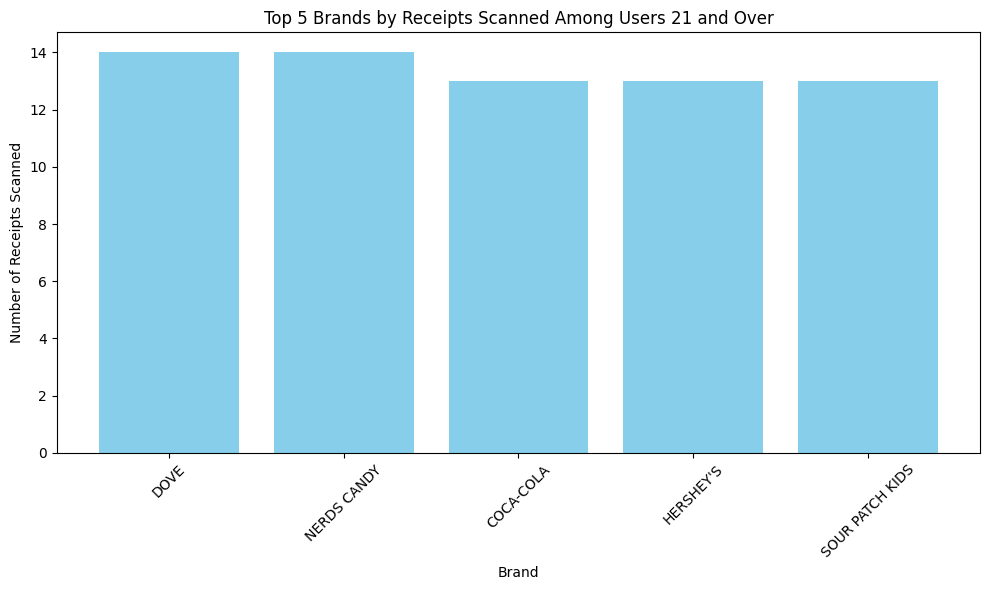

In [381]:
# Visualization
plt.figure(figsize=(10, 6))
plt.bar(top_brands['Brand'], top_brands['Receipt Count'], color='skyblue')
plt.title('Top 5 Brands by Receipts Scanned Among Users 21 and Over')
plt.xlabel('Brand')
plt.ylabel('Number of Receipts Scanned')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


What are the top 5 brands by sales among users that have had their account for at least six months?

In [382]:
# Convert CREATED_DATE to datetime in Users data and remove timezone info
users_df['CREATED_DATE'] = pd.to_datetime(users_df['CREATED_DATE'], errors='coerce').dt.tz_localize(None)


In [383]:
# Calculate account age in months based on the current date
users_df['ACCOUNT_AGE_MONTHS'] = users_df['CREATED_DATE'].apply(lambda x: (datetime.now() - x).days // 30 if pd.notnull(x) else None)

In [384]:
# Filter users who have had accounts for at least six months
users_6_months_and_over = users_df[users_df['ACCOUNT_AGE_MONTHS'] >= 6]

In [385]:
# Merge filtered users with transactions
transactions_with_users = transactions_df.merge(users_6_months_and_over[['ID']], left_on='USER_ID', right_on='ID')

In [386]:
# Merge transactions (with users 6+ months) with products to get brand information
transactions_with_products = transactions_with_users.merge(products_df[['BRAND', 'BARCODE']], on='BARCODE', how='inner')

In [387]:
# Convert FINAL_SALE to numeric, forcing errors to NaN, then fill NaNs with 0 for aggregation
transactions_with_products['FINAL_SALE'] = pd.to_numeric(transactions_with_products['FINAL_SALE'], errors='coerce').fillna(0)

In [388]:
# Sum the sales per brand and get top 5
top_brands_by_sales = transactions_with_products.groupby('BRAND')['FINAL_SALE'].sum().nlargest(5).reset_index()
top_brands_by_sales.columns = ['Brand', 'Total Sales']


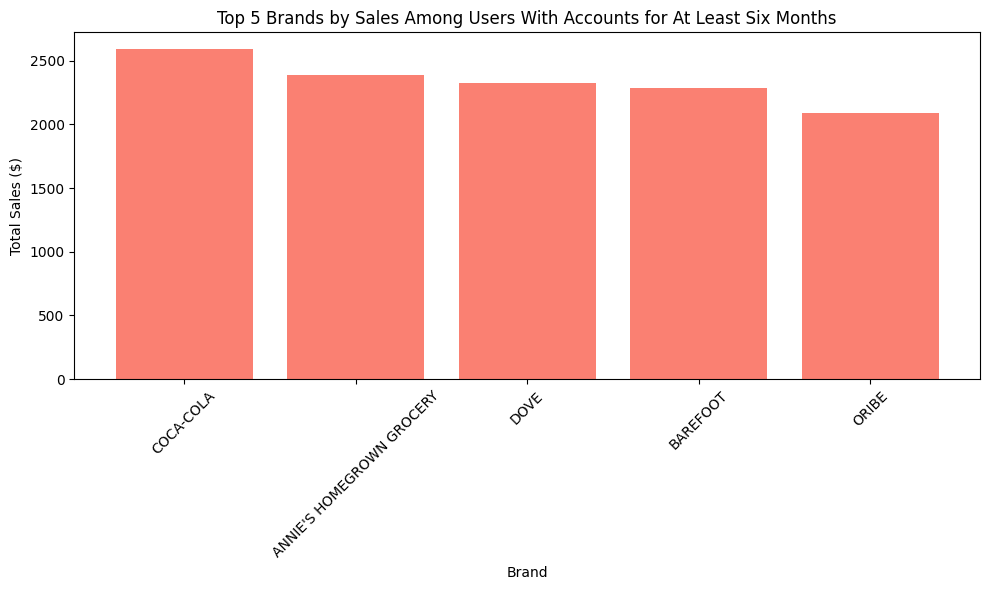

In [389]:
# Visualization
plt.figure(figsize=(10, 6))
plt.bar(top_brands_by_sales['Brand'], top_brands_by_sales['Total Sales'], color='salmon')
plt.title('Top 5 Brands by Sales Among Users With Accounts for At Least Six Months')
plt.xlabel('Brand')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()